<a href="https://colab.research.google.com/github/18520395/CS114.K21/blob/master/snakeclassification/venomoussnake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Input: Snake photo
Output: Venomous or Non-venomous

Dataset from:


Models used:
- Linear SVM
- Logistic Regression
- 

In [ ]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [13]:
#load data
!unzip /content/drive/'My Drive'/'hk2 2019-2020'/'machine learning'/'venomous snake classification'/snake.zip

Streaming output truncated to the last 5000 lines.
  inflating: snake/non-venomous/Indian-Rock-Python-Langur-kill-2.jpg  
  inflating: snake/non-venomous/Indian-Rock-Python-Langur-kill-3.jpg  
  inflating: snake/non-venomous/Indian-Rock-Python-Langur-kill-4.jpg  
  inflating: snake/non-venomous/Indian-Rock-Python-Langur-kill-5.jpg  
  inflating: snake/non-venomous/indian-rock-python-on-the-road--nagarhole.jpg  
  inflating: snake/non-venomous/indian-rock-python-or-indian-python-python-molurus-in-ranthambhore-FXYGTF.jpg  
  inflating: snake/non-venomous/indian-rock-python-python-molurus-aarey-milk-colony-india-J21E53.jpg  
  inflating: snake/non-venomous/indian-rock-python-python-molurus-aarey-milk-colony-india-j21e53_001.jpg  
  inflating: snake/non-venomous/indian-rock-python-python-molurus-aka-indian-python-rock-python-black-F2JD6R.jpg  
  inflating: snake/non-venomous/indian-rock-python-python-molurus-barnawapara-wls-chhattisgarh-hnwtn1.jpg  
  inflating: snake/non-venomous/indian-r

In [14]:
#import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from imutils import paths
from keras.applications import VGG16
from keras.applications import imagenet_utils
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
import random
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.externals import joblib
import cv2
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [15]:
!mv "/content/snake" "/content/drive/My Drive/hk2 2019-2020/machine learning/venomous snake classification/data"

In [16]:
#image path
image_path = list(paths.list_images('/content/drive/My Drive/hk2 2019-2020/machine learning/venomous snake classification/data/snake'))

random.shuffle(image_path)
print(image_path)

['/content/drive/My Drive/hk2 2019-2020/machine learning/venomous snake classification/data/snake/non-venomous/python_molurus_1.jpg', '/content/drive/My Drive/hk2 2019-2020/machine learning/venomous snake classification/data/snake/venomous/IMG_7375.jpg', '/content/drive/My Drive/hk2 2019-2020/machine learning/venomous snake classification/data/snake/non-venomous/7841c9606134013d0ba9c6787a1982cd.jpg', '/content/drive/My Drive/hk2 2019-2020/machine learning/venomous snake classification/data/snake/venomous/ad3c06f72833224f0a56321b191c9bda.jpg', '/content/drive/My Drive/hk2 2019-2020/machine learning/venomous snake classification/data/snake/venomous/bb9516645d51c1c5b02025336738f6f9.jpg', '/content/drive/My Drive/hk2 2019-2020/machine learning/venomous snake classification/data/snake/non-venomous/efcf77bcc6cdd47d56e18f1cfbaf5764.jpg', '/content/drive/My Drive/hk2 2019-2020/machine learning/venomous snake classification/data/snake/non-venomous/cfad3ae2ca3b82749caad0bc778cfa0e.jpg', '/conten

In [17]:
#label images
labels = [p.split(os.path.sep)[-2] for p in image_path]

#changing snake type to digit
le = LabelEncoder()
labels = le.fit_transform(labels)

In [18]:
#load ImageNet's VGG 16 model without Fully connected Layer
model = VGG16(weights='imagenet', include_top=False)

In [19]:
#resize images to (224,224)
list_image = []
for (j, imagePath) in enumerate(image_path):
    image = load_img(imagePath, target_size=(224, 224))
    image = img_to_array(image)
    
    image = np.expand_dims(image, 0)
    image = imagenet_utils.preprocess_input(image)
    
    list_image.append(image)
  
list_image = np.vstack(list_image)

In [20]:
#featuring 
features = model.predict(list_image)

#3 dims tensor ConvNet -> 1 dim vector
features = features.reshape((features.shape[0], 512*7*7))

In [21]:
#splitting data
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.15, random_state=42)

In [22]:
#train with svm
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [23]:
#valuation
y_pred = svm_linear.predict(X_test)
accuracy_score(y_pred,y_test)

0.8402100525131283

In [24]:
#train with Logistic Regression
reg = LogisticRegression()
reg.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
#valuation
y_pred = reg.predict(X_test)
accuracy_score(y_pred,y_test)

0.8612153038259565

In [26]:
#save model
joblib.dump(svm_linear, '/content/drive/My Drive/hk2 2019-2020/machine learning/venomous snake classification/model/svm_linear1.pkl')
joblib.dump(svm_linear, '/content/drive/My Drive/hk2 2019-2020/machine learning/venomous snake classification/model/logistic_regression1.pkl')

['/content/drive/My Drive/hk2 2019-2020/machine learning/venomous snake classification/model/logistic_regression1.pkl']

In [27]:
#load model
svm_linear=joblib.load('/content/drive/My Drive/hk2 2019-2020/machine learning/venomous snake classification/model/svm_linear1.pkl')
logistic_regression =joblib.load('/content/drive/My Drive/hk2 2019-2020/machine learning/venomous snake classification/model/logistic_regression1.pkl')

In [33]:
#test model
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  path = '/content/' + fn 
  image = load_img(path, target_size=(224, 224))
  image = img_to_array(image)
    
  image = np.expand_dims(image, 0)
  image = imagenet_utils.preprocess_input(image)
    
  image = np.vstack([image])

  features = model.predict(image)

  features = features.reshape((features.shape[0], 512*7*7))
  v = svm_linear.predict(features)
  v1 = logistic_regression.predict(features)

print("SVM result: ")
if v[0] == 0:
  print("=========================nonvenomous=========================")
if v[0] == 1:
  print("=========================venomous=========================")

print("Logistic Regression result: ")
if v1[0] == 0:
  print("=========================nonvenomous=========================")
if v1[0] == 1:
  print("=========================venomous=========================")

Saving lam-the-nao-khi-bi-ran-luc-duoi-do-tan-cong-1512793666979.jpg to lam-the-nao-khi-bi-ran-luc-duoi-do-tan-cong-1512793666979 (3).jpg
SVM result: 
=========================venomous=========================
Logistic Regression result: 
=========================venomous=========================


In [ ]:
#=====================================================Fine tuning=====================================================#
#impot libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from imutils import paths
from keras.applications import VGG16
from keras.applications import imagenet_utils
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD
from keras.optimizers import RMSprop, Adam
from keras import layers
from keras import models
from keras.applications import VGG16
from keras.layers import Input
from keras.models import Model
from keras.layers.core import Dense
from keras.layers.core import Dropout
from keras.layers.core import Flatten
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os
from pathlib import Path

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
snakes_path=Path('/content/drive/My Drive/hk2 2019-2020/machine learning/venomous snake classification/data/snake')
snakes_types = os.listdir(snakes_path)
snakes = []
for species in snakes_types:
    all_snakes = os.listdir(snakes_path / species)
    for snake in all_snakes:
        snakes.append((species, str(snakes_path /species) + '/' + snake))
     
snakes = pd.DataFrame(data=snakes, columns=['category', 'image'], index=None)
snakes.head()

,category,image
0,non-venomous,/content/drive/My Drive/hk2 2019-2020/machine ...
1,non-venomous,/content/drive/My Drive/hk2 2019-2020/machine ...
2,non-venomous,/content/drive/My Drive/hk2 2019-2020/machine ...
3,non-venomous,/content/drive/My Drive/hk2 2019-2020/machine ...
4,non-venomous,/content/drive/My Drive/hk2 2019-2020/machine ...


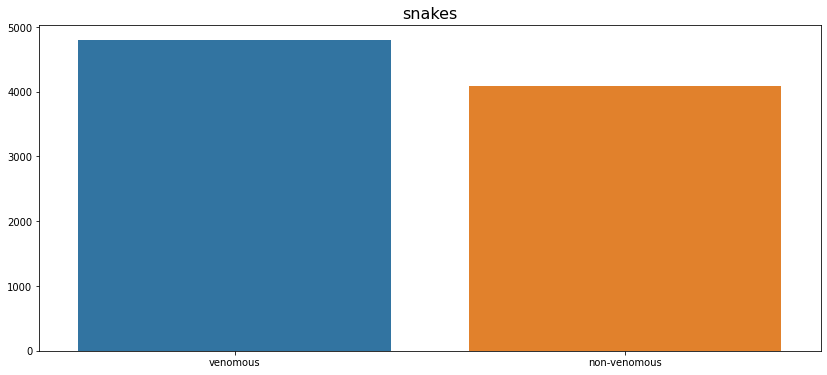

In [ ]:
fl_count = snakes['category'].value_counts()
f, axe = plt.subplots(1,1,figsize=(14,6))
sns.barplot(x = fl_count.index, y = fl_count.values, ax = axe)
axe.set_title("snakes", fontsize=16)
plt.show()

In [ ]:
#image path
image_path = list(paths.list_images('/content/drive/My Drive/hk2 2019-2020/machine learning/venomous snake classification/data/snake'))
#shuffle paths
random.shuffle(image_path)

In [ ]:
#label images
labels = [p.split(os.path.sep)[-2] for p in image_path]

#changing snake type to digit
le = LabelEncoder()
labels = le.fit_transform(labels)

# One-hot encoding
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [ ]:
#resize images to (224,224)
list_image = []
for (j, imagePath) in enumerate(image_path):
    image = load_img(imagePath, target_size=(224, 224))
    image = img_to_array(image)
    
    image = np.expand_dims(image, 0)
    image = imagenet_utils.preprocess_input(image)
    
    list_image.append(image)
  
list_image = np.vstack(list_image)

In [ ]:
# Load model VGG 16 của ImageNet dataset, include_top=False để bỏ phần Fully connected layer ở cuối.
conv_base  = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(5, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               12845568  
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                

In [ ]:
# Chia traing set, test set tỉ lệ 80-20
X_train, X_test, y_train, y_test = train_test_split(list_image, labels, test_size=0.2, random_state=42)

In [ ]:
# augmentation cho training data
aug_train = ImageDataGenerator(rescale=1./255, rotation_range=30, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                         zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')
# augementation cho test
aug_test= ImageDataGenerator(rescale=1./255)

In [ ]:
# freeze VGG model
for layer in conv_base.layers:
    layer.trainable = False
    
opt = Adam(2e-5)
model.compile(opt, 'categorical_crossentropy', ['accuracy'])
numOfEpoch = 20
H = model.fit_generator(aug_train.flow(X_train, y_train, batch_size=32), 
                        steps_per_epoch=len(X_train)//32,
                        validation_data=(aug_test.flow(X_test, y_test, batch_size=32)),
                        validation_steps=len(X_test)//32,
                        epochs=numOfEpoch)

Epoch 1/20


ValueError: ignored

In [ ]:
# unfreeze some last CNN layer:
for layer in conv_base.layers[15:]:
    layer.trainable = True

numOfEpoch = 25
opt = Adam(2e-5)
model.compile(opt, 'categorical_crossentropy', ['accuracy'])
H1 = model.fit_generator(aug_train.flow(X_train, y_train, batch_size=32), 
                        steps_per_epoch=len(X_train)//32,
                        validation_data=(aug_test.flow(X_test, y_test, batch_size=32)),
                        validation_steps=len(X_test)//32,
                        epochs=numOfEpoch)

Epoch 1/35


ValueError: ignored

In [ ]:
H.history['loss'].extend(H1.history['loss'])
H.history['accuracy'].extend(H1.history['accuracy'])
H.history['val_loss'].extend(H1.history['val_loss'])
H.history['val_accuracy'].extend(H1.history['val_accuracy'])

import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
fig.suptitle("Performance of Model")
ax1.plot(H.history['accuracy'])
ax1.plot(H.history['val_accuracy'])
vline_cut = np.where(H.history['val_accuracy'] == np.max(H.history['val_accuracy']))[0][0]
ax1.set_title("Model Accuracy")
ax1.legend(['train', 'val'])

ax2.plot(H.history['loss'])
ax2.plot(H.history['val_loss'])
vline_cut = np.where(H.history['val_loss'] == np.min(H.history['val_loss']))[0][0]
ax2.set_title("Model Loss")
ax2.legend(['train', 'val'])
plt.show()

In [ ]:
y_pred = model.predict(X_test)
rounded_labels=np.argmax(y_test, axis=1)
rounded_pred=np.argmax(y_pred, axis=1)
print(confusion_matrix(rounded_labels,rounded_pred),'\n')
print(classification_report(rounded_labels,rounded_pred))